In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import numpy as np
import sys

In [11]:
fashion_mnist=tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test)= fashion_mnist.load_data()


In [4]:
 print(X_train.shape)
 print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [5]:
     X_val = X_test[:8000]
     y_val = y_test[:8000]
     X_test = X_test[8000:]
     y_test = y_test[8000:]

In [6]:
 print(X_train.shape)
 print(X_test.shape)
 print(X_val.shape)

(60000, 28, 28)
(2000, 28, 28)
(8000, 28, 28)


In [13]:
targets_names=["T-Shirt", "Trousers", "Pullover", "Dress", "Coat","Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot" ]

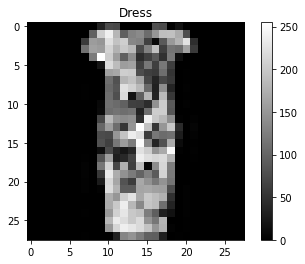

In [14]:
 plt.figure()
 plt.imshow(X_test[100], cmap='gray')
 plt.colorbar()
 plt.title(targets_names[y_test[100]])
 plt.show()

In [4]:
from tensorflow.keras.layers import Conv2D, BatchNormalization,MaxPooling2D, Flatten, Dense

In [5]:
     model_Over=tf.keras.Sequential([
         Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', 
                input_shape=(28, 28, 1)),
         BatchNormalization(),
         Conv2D(64, kernel_size=(3, 3), activation='relu'),
         BatchNormalization(),
         MaxPooling2D(pool_size=(2, 2)),

         Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
         BatchNormalization(),
         Conv2D(128, kernel_size=(3, 3), activation='relu'),
         BatchNormalization(),        
         MaxPooling2D(pool_size=(2, 2)),
        
         Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
         BatchNormalization(),
         Conv2D(256, kernel_size=(3, 3), activation='relu'),
         BatchNormalization(),    
         MaxPooling2D(pool_size=(2, 2)),   
        
         Flatten(),
        
         Dense(1024, activation='relu'),
        
         Dense(512, activation='relu'),
        
         Dense(10, activation='softmax')
     ])
    
   

In [6]:
 
model_Over.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model_Over.fit(X_train, y_train, epochs=15,batch_size=32, validation_data=(X_val, y_val))

Epoch 1/15
1875/1875 [==============================] - 206s 109ms/step - loss: 0.3826 - accuracy: 0.8619 - val_loss: 0.3195 - val_accuracy: 0.8805
Epoch 2/15
1875/1875 [==============================] - 207s 110ms/step - loss: 0.2565 - accuracy: 0.9083 - val_loss: 0.4258 - val_accuracy: 0.8708
Epoch 3/15
1875/1875 [==============================] - 205s 109ms/step - loss: 0.2200 - accuracy: 0.9214 - val_loss: 0.3009 - val_accuracy: 0.9032
Epoch 4/15
1875/1875 [==============================] - 207s 110ms/step - loss: 0.1904 - accuracy: 0.9308 - val_loss: 0.2911 - val_accuracy: 0.9005
Epoch 5/15
 241/1875 [==>...........................] - ETA: 2:58 - loss: 0.1498 - accuracy: 0.9472

Add weight regularization

#### TODO Applying L2 regularization

In [ ]:
##TODO L2

In [7]:
from tensorflow.keras import regularizers
model_l2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dense(64, activation = 'relu',kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model_l2.compile(optimizer='adam', loss='SparseCategoricalCrossentropy', metrics=['accuracy'])
model_l2.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

In [ ]:
# evaluate metrics
print("\nEvaluating...", flush=True)
print('Training data:', flush=True)
loss, acc = model_l2.evaluate(X_train, y_train, verbose=0)
print("  Training : loss %.3f - acc %.3f" % (loss, acc))
print('Validation data:', flush=True)
loss, acc = model_l2.evaluate(X_val, y_val, verbose=0)
print("  Val: loss %.3f - acc %.3f" % (loss, acc))
print('Test data:', flush=True)
loss, acc = model_l2.evaluate(X_test, y_test, verbose=0)
print("  Testing  : loss %.3f - acc %.3f" % (loss, acc))

#### TODO Dropout

In [ ]:
## TODO Droupout

In [8]:
model_dropout = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation='softmax')
])


In [ ]:
model_dropout.compile(optimizer='adam',
              loss='SparseCategoricalCrossentropy',
              metrics=['accuracy'])
model_dropout.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

In [ ]:
model_dropout.summary()

#### TODO Early Stop

In [ ]:
## TODO Early Stop

In [ ]:
model_ES = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28,1)),
        tf.keras.layers.Dense(256, activation = 'relu'),
        tf.keras.layers.Dense(128, activation = 'relu'),
        tf.keras.layers.Dense(64, activation = 'relu'),
        tf.keras.layers.Dense(10, activation = 'softmax')
])

model_ES.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Stop training when there is no improvement in the validation loss for 2 consecutive epochs
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

history_ES = model_ES.fit(X_train, y_train,
                    epochs = 10,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping])

#### TODO Data Augmentation

In [16]:
## TODO Data Augmentation

from keras import layers
import keras

In [19]:
IMG_SIZE = 180

resize_and_rescale = keras.Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255)
])

result = resize_and_rescale(targets_names[1])
plt.axis('off')
plt.imshow(result);

TypeError: Exception encountered when calling layer 'resizing_2' (type Resizing).

Cannot convert 'Trousers' to EagerTensor of dtype float

Call arguments received by layer 'resizing_2' (type Resizing):
  • inputs='Trousers'

#### TODO Performance Comparison